# Evaluation of the models

**Comparison of all models**:
- Logistic Regression
- Random Forest
- Support Vector Machine with RBF kernel
- Deep Neural Network (Multilayer Perceptron)

## 0 Imports

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("../dat/dips/DIPS_Data_cleaned.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [38]:
# weights
weights_lr_unreg = pd.read_csv("../exp/weights/weights_lr_unreg.csv", sep = ",")
weights_lr_lasso = pd.read_csv("../exp/weights/weights_lr_lasso.csv", sep = ",")
weights_rf = pd.read_csv("../exp/weights/weights_rf.csv", sep = ",")
weights_svc = pd.read_csv("../exp/weights/weights_svc.csv", sep = ",")
weights_dnn = pd.read_csv("../exp/weights/weights_dnn.csv", sep = ",")

In [53]:
# predictions
y_pred_lr_unreg = pd.read_csv("../exp/predictions/y_pred_lr_unreg.csv", sep = ",")
y_pred_lr_lasso = pd.read_csv("../exp/predictions/y_pred_lr_lasso.csv", sep = ",")
y_pred_rf = pd.read_csv("../exp/predictions/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("../exp/predictions/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("../exp/predictions/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("../exp/predictions/y_pred_knn.csv", sep = ",")

y_pred_GPT4_simple_prompt = pd.read_csv("../exp/preds_LLMs/y_pred_GPT4_simple_prompt.csv", sep = ",")
y_pred_GPT4_class_definitions_prompt = pd.read_csv("../exp/preds_LLMs/y_pred_GPT4_class_definitions_prompt.csv", sep = ",")
y_pred_GPT4_profiled_simple_prompt = pd.read_csv("../exp/preds_LLMs/y_pred_GPT4_profiled_simple_prompt.csv", sep = ",")
y_pred_GPT4_few_shot_prompt = pd.read_csv("../exp/preds_LLMs/y_pred_GPT4_few_shot_prompt.csv", sep = ",")
y_pred_GPT4_vignette_prompt = pd.read_csv("../exp/preds_LLMs/y_pred_GPT4_vignette_prompt.csv", sep = ",")

# 1 Metrics

In [54]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [42]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall
    }

    return metrics

In [55]:
# calculate metrics for all models
metrics_lr_unreg = calculate_metrics(y_test, y_pred_lr_unreg)
metrics_lr_lasso = calculate_metrics(y_test, y_pred_lr_lasso)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_GPT4_simple_prompt = calculate_metrics(y_test, y_pred_GPT4_simple_prompt)
metrics_GPT4_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT4_class_definitions_prompt)
metrics_GPT4_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT4_profiled_simple_prompt)
metrics_GPT4_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT4_few_shot_prompt)
metrics_GPT4_vignette_prompt = calculate_metrics(y_test, y_pred_GPT4_vignette_prompt)

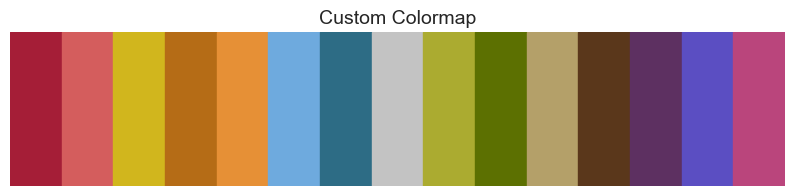

In [56]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

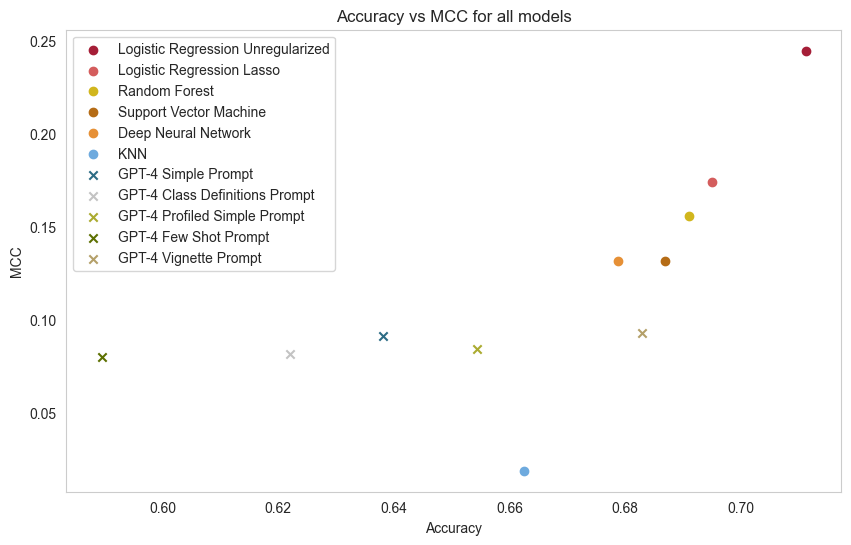

In [57]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr_unreg["accuracy"], metrics_lr_unreg["mcc"], label = "Logistic Regression Unregularized", color = hex_colors[0])
plt.scatter(metrics_lr_lasso["accuracy"], metrics_lr_lasso["mcc"], label = "Logistic Regression Lasso", color = hex_colors[1])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[2])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[3])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[5])
plt.scatter(metrics_GPT4_simple_prompt["accuracy"], metrics_GPT4_simple_prompt["mcc"], label = "GPT-4 Simple Prompt", color = hex_colors[6], marker = "x")
plt.scatter(metrics_GPT4_class_definitions_prompt["accuracy"], metrics_GPT4_class_definitions_prompt["mcc"], label = "GPT-4 Class Definitions Prompt", color = hex_colors[7], marker = "x")
plt.scatter(metrics_GPT4_profiled_simple_prompt["accuracy"], metrics_GPT4_profiled_simple_prompt["mcc"], label = "GPT-4 Profiled Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_GPT4_few_shot_prompt["accuracy"], metrics_GPT4_few_shot_prompt["mcc"], label = "GPT-4 Few Shot Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT4_vignette_prompt["accuracy"], metrics_GPT4_vignette_prompt["mcc"], label = "GPT-4 Vignette Prompt", color = hex_colors[10], marker = "x")
plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all models")
plt.legend()
plt.grid()
plt.show()

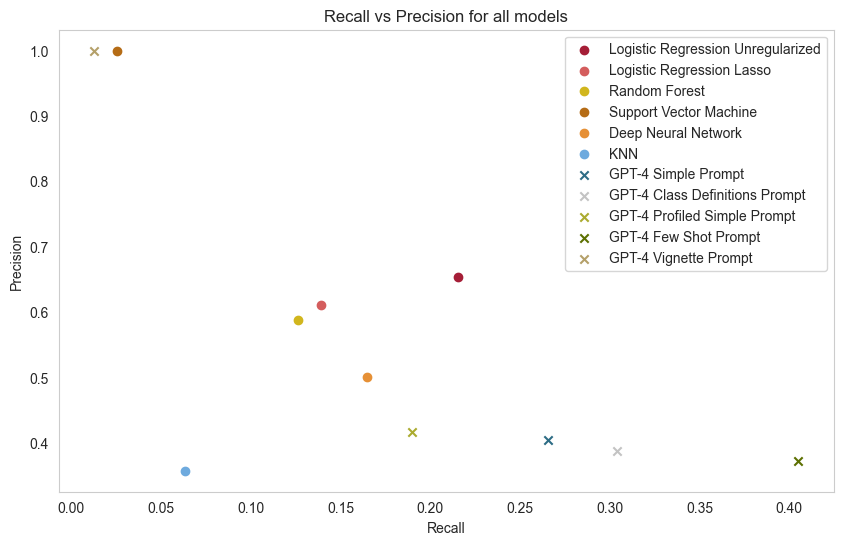

In [59]:
# plot recall vs precision for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr_unreg["recall"], metrics_lr_unreg["precision"], label = "Logistic Regression Unregularized", color = hex_colors[0])
plt.scatter(metrics_lr_lasso["recall"], metrics_lr_lasso["precision"], label = "Logistic Regression Lasso", color = hex_colors[1])
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[2])
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[3])
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[5])
plt.scatter(metrics_GPT4_simple_prompt["recall"], metrics_GPT4_simple_prompt["precision"], label = "GPT-4 Simple Prompt", color = hex_colors[6], marker = "x")
plt.scatter(metrics_GPT4_class_definitions_prompt["recall"], metrics_GPT4_class_definitions_prompt["precision"], label = "GPT-4 Class Definitions Prompt", color = hex_colors[7], marker = "x")
plt.scatter(metrics_GPT4_profiled_simple_prompt["recall"], metrics_GPT4_profiled_simple_prompt["precision"], label = "GPT-4 Profiled Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_GPT4_few_shot_prompt["recall"], metrics_GPT4_few_shot_prompt["precision"], label = "GPT-4 Few Shot Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT4_vignette_prompt["recall"], metrics_GPT4_vignette_prompt["precision"], label = "GPT-4 Vignette Prompt", color = hex_colors[10], marker = "x")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision for all models")
plt.legend()
plt.grid()
plt.show()

# 2 Feature importance